In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedKFold
from scipy.io.arff import loadarff 


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB

from imblearn.under_sampling import RandomUnderSampler
from sklearn import model_selection, naive_bayes, svm


Using TensorFlow backend.


## Reading dataset

In [3]:
raw_data = loadarff('Part1Features.arff')
train_data = pd.DataFrame(raw_data[0])
train_data['class'].replace({b'-1':-1, b'1': 1}, inplace= True)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6989 entries, 0 to 6988
Columns: 189 entries, Feature1 to class
dtypes: float64(188), int64(1)
memory usage: 10.1 MB


## Exploratory Data Analysis

In [5]:
train_data.head(10)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature180,Feature181,Feature182,Feature183,Feature184,Feature185,Feature186,Feature187,Feature188,class
0,0.000000,0.0,0.000000,0.000000,9.090909,27.272727,0.000000,9.090909,0.000000,9.090909,...,0.000000,0.000000,0.000000,90.909091,18.181818,18.181818,27.272727,63.636364,100.000000,-1
1,0.000000,0.0,0.000000,0.000000,9.090909,27.272727,0.000000,9.090909,0.000000,9.090909,...,0.000000,0.000000,0.000000,90.909091,18.181818,18.181818,27.272727,63.636364,100.000000,-1
2,9.090909,0.0,0.000000,0.000000,0.000000,18.181818,0.000000,9.090909,0.000000,9.090909,...,0.000000,90.909091,90.909091,100.000000,27.272727,0.000000,27.272727,63.636364,81.818182,-1
3,0.000000,0.0,0.000000,9.090909,9.090909,9.090909,0.000000,18.181818,0.000000,0.000000,...,0.000000,36.363636,36.363636,63.636364,9.090909,9.090909,27.272727,54.545455,72.727273,-1
4,0.000000,0.0,9.090909,9.090909,0.000000,18.181818,0.000000,0.000000,0.000000,9.090909,...,9.090909,18.181818,54.545455,90.909091,45.454545,45.454545,63.636364,72.727273,81.818182,-1
5,9.090909,0.0,9.090909,9.090909,18.181818,0.000000,9.090909,0.000000,18.181818,9.090909,...,9.090909,45.454545,54.545455,90.909091,100.000000,0.000000,0.000000,0.000000,100.000000,-1
6,0.000000,0.0,0.000000,0.000000,9.090909,0.000000,0.000000,0.000000,0.000000,18.181818,...,18.181818,27.272727,72.727273,90.909091,9.090909,9.090909,36.363636,45.454545,54.545455,-1
7,0.000000,0.0,0.000000,0.000000,9.090909,18.181818,0.000000,9.090909,0.000000,0.000000,...,0.000000,0.000000,0.000000,90.909091,18.181818,18.181818,45.454545,63.636364,100.000000,-1
8,18.181818,0.0,0.000000,0.000000,0.000000,9.090909,0.000000,0.000000,0.000000,18.181818,...,0.000000,0.000000,0.000000,0.000000,9.090909,9.090909,36.363636,45.454545,90.909091,-1
9,0.000000,0.0,0.000000,0.000000,9.090909,18.181818,0.000000,9.090909,9.090909,9.090909,...,0.000000,9.090909,9.090909,63.636364,18.181818,0.000000,18.181818,27.272727,54.545455,-1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6989 entries, 0 to 6988
Columns: 189 entries, Feature1 to class
dtypes: float64(188), int64(1)
memory usage: 10.1 MB


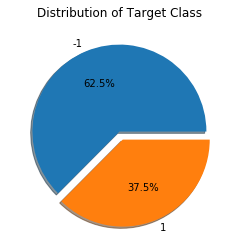

In [7]:
ax=train_data['class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%' ,shadow=True)
ax.set_title('Distribution of Target Class')
ax.set_ylabel('')
plt.show()

AMP:  2618
Non AMP :  4371


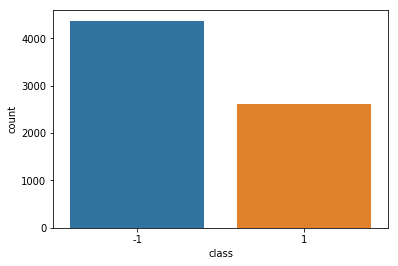

In [8]:
import seaborn as sb

plot_sb = sb.countplot(train_data['class'], label='Total')
NonAMP, AMP = train_data['class'].value_counts()
print('AMP: ',AMP)
print('Non AMP : ',NonAMP)

## Feature Scaling

In [9]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(train_data)
train_data = pd.DataFrame(scaler.transform(train_data), index=train_data.index, columns = train_data.columns)
train_data.head(10)


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature180,Feature181,Feature182,Feature183,Feature184,Feature185,Feature186,Feature187,Feature188,class
0,0.000000,0.0,0.000000,0.000000,0.194805,0.373946,0.000000,0.227273,0.000000,0.147727,...,0.000000,0.000000,0.000000,0.909091,0.181818,0.231975,0.303030,0.656891,1.000000,0.0
1,0.000000,0.0,0.000000,0.000000,0.194805,0.373946,0.000000,0.227273,0.000000,0.147727,...,0.000000,0.000000,0.000000,0.909091,0.181818,0.231975,0.303030,0.656891,1.000000,0.0
2,0.142857,0.0,0.000000,0.000000,0.000000,0.249297,0.000000,0.227273,0.000000,0.147727,...,0.000000,0.959596,0.928854,1.000000,0.272727,0.000000,0.303030,0.656891,0.818182,0.0
3,0.000000,0.0,0.000000,0.190083,0.194805,0.124649,0.000000,0.454545,0.000000,0.000000,...,0.000000,0.383838,0.371542,0.636364,0.090909,0.115987,0.303030,0.563050,0.727273,0.0
4,0.000000,0.0,0.295455,0.190083,0.000000,0.249297,0.000000,0.000000,0.000000,0.147727,...,0.109091,0.191919,0.557312,0.909091,0.454545,0.579937,0.707071,0.750733,0.818182,0.0
5,0.142857,0.0,0.295455,0.190083,0.389610,0.000000,0.146853,0.000000,0.303030,0.147727,...,0.109091,0.479798,0.557312,0.909091,1.000000,0.000000,0.000000,0.000000,1.000000,0.0
6,0.000000,0.0,0.000000,0.000000,0.194805,0.000000,0.000000,0.000000,0.000000,0.295455,...,0.218182,0.287879,0.743083,0.909091,0.090909,0.115987,0.404040,0.469208,0.545455,0.0
7,0.000000,0.0,0.000000,0.000000,0.194805,0.249297,0.000000,0.227273,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.909091,0.181818,0.231975,0.505051,0.656891,1.000000,0.0
8,0.285714,0.0,0.000000,0.000000,0.000000,0.124649,0.000000,0.000000,0.000000,0.295455,...,0.000000,0.000000,0.000000,0.000000,0.090909,0.115987,0.404040,0.469208,0.909091,0.0
9,0.000000,0.0,0.000000,0.000000,0.194805,0.249297,0.000000,0.227273,0.151515,0.147727,...,0.000000,0.095960,0.092885,0.636364,0.181818,0.000000,0.202020,0.281525,0.545455,0.0


## Feature Extraction

In [10]:
X = train_data.loc[:,train_data.columns!='class']
y = train_data[['class']]

In [11]:
X.shape

(6989, 188)

In [12]:
y.shape

(6989, 1)

In [13]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.25)
#train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, stratify=train_y, test_size=0.1)

In [14]:
print("Train shape : ",train_X.shape)
#print("Validation shape : ",val_X.shape)
print("Test shape : ",test_X.shape)

Train shape :  (5241, 188)
Test shape :  (1748, 188)


In [15]:
unique, counts = np.unique(train_y, return_counts=True)
print(np.asarray((unique, counts)).T)

# unique, counts = np.unique(val_y, return_counts=True)
# print(np.asarray((unique, counts)).T)

unique, counts = np.unique(test_y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[0.000e+00 3.278e+03]
 [1.000e+00 1.963e+03]]
[[0.000e+00 1.093e+03]
 [1.000e+00 6.550e+02]]


## Undersampling

In [16]:
def undersampleData(train_text_features_tf, train_y):
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(train_text_features_tf, train_y)
    return X_resampled, y_resampled

## Oversampling

In [17]:
def oversampleData(train_text_features_tf, train_y):
    from imblearn.over_sampling import SMOTE
    smote = SMOTE('minority')
    x_oversampled, y_oversampled = smote.fit_sample(train_text_features_tf, train_y)
    return x_oversampled, y_oversampled

## Function for Confusion Matrix

In [18]:
def getConfusionMatrix(y_test, y_pred):
  # Confusion matrix
  mat = confusion_matrix(y_test, y_pred)
  cm = pd.DataFrame(mat)
  TP = cm.iloc[1,1] # True Positive
  TN = cm.iloc[0,0] # True Negative
  FP = cm.iloc[0,1] # False Positive
  FN = cm.iloc[1,0] # False Negative

  print('Sensitivity: {:.2%}'.format(TP/(FN+TP)))
  print('Specificity: {:.2%}'.format(TN/(FP+TN)))
  
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
  plt.title('A confusion matrix showing the frequency of misclassifications by our classifier')
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  plt.show()

## Model

In [19]:
def model(model, X, train_X, train_y, test_X, test_y, undersampled = False, oversample = False):
    

    final_x = train_X
    final_y = train_y
    
    
    if undersampled:
        print('Undersampling the dataset')
        final_x, final_y = undersampleData(train_X, train_y)

    if oversample:
        print('Oversampling the dataset')
        final_x, final_y = oversampleData(train_X, train_y)
        
    model.fit(final_x, final_y)

    # predict the labels on validation dataset
    predictions = model.predict(test_X)

    # Use accuracy_score function to get the accuracy
    print("Accuracy Score -> ",accuracy_score(predictions, test_y)*100)

    print('F1Score', f1_score(predictions, test_y, average="macro"))
    print('Precision', precision_score(predictions, test_y, average="macro"))
    print('Recall', recall_score(predictions, test_y, average="macro"))

    getConfusionMatrix(test_y, predictions)

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression



Undersampling the dataset
Accuracy Score ->  80.09153318077803
F1Score 0.7943640641479839
Precision 0.8068499752065539
Recall 0.7908774447947438
Sensitivity: 83.05%
Specificity: 78.32%


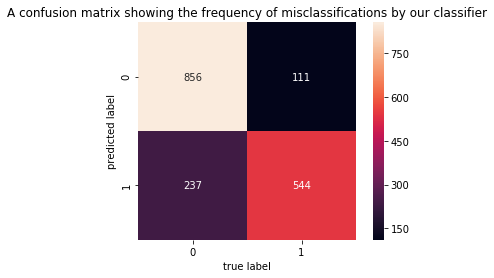

In [21]:
model(LogisticRegression(random_state=0), X, train_X, train_y,
      test_X, test_y, undersampled = True, oversample = False)

Accuracy Score ->  79.86270022883295
F1Score 0.7836438923395445
Precision 0.7817715790282366
Recall 0.7858117442033452
Sensitivity: 71.45%
Specificity: 84.90%


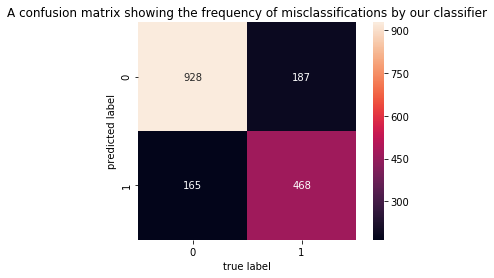

In [22]:
model(LogisticRegression(random_state=0), X, train_X, train_y,
      test_X, test_y, undersampled = False, oversample = False)

Oversampling the dataset
Accuracy Score ->  80.49199084668193
F1Score 0.7979347627478958
Precision 0.8091344642869615
Recall 0.7940502763605443
Sensitivity: 82.60%
Specificity: 79.23%


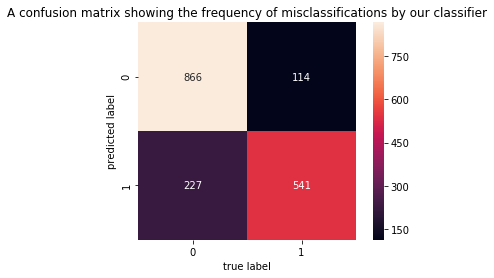

In [23]:
model(LogisticRegression(random_state=0), X, train_X, train_y,
      test_X, test_y, undersampled = False, oversample = True)

## SVM

Undersampling the dataset
Accuracy Score ->  80.26315789473685
F1Score 0.797547649621069
Precision 0.8140344873343903
Recall 0.7956192670201128
Sensitivity: 85.95%
Specificity: 76.85%


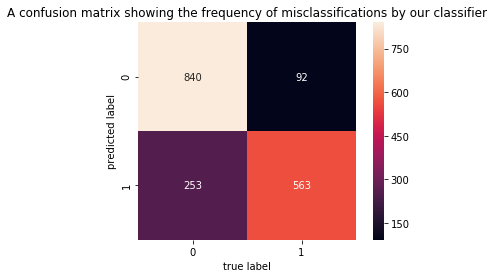

In [24]:
model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), X, train_X, train_y,
      test_X, test_y, undersampled = True, oversample = False)

Oversampling the dataset
Accuracy Score ->  80.43478260869566
F1Score 0.7984912529072707
Precision 0.8126537368262992
Recall 0.7954371168174649
Sensitivity: 84.58%
Specificity: 77.95%


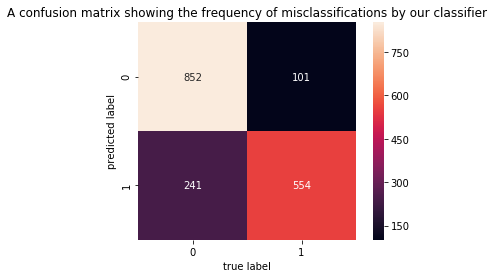

In [25]:
model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), X, train_X, train_y,
      test_X, test_y, undersampled = False, oversample = True)

Accuracy Score ->  80.77803203661327
F1Score 0.7962398627833007
Precision 0.7982679508042156
Recall 0.7945031286763844
Sensitivity: 76.03%
Specificity: 83.62%


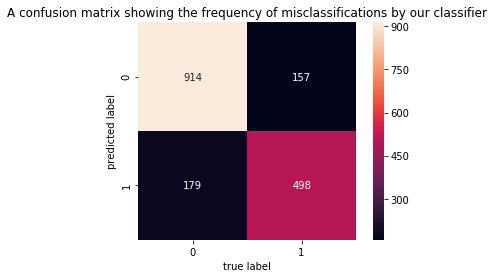

In [26]:
model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), X, train_X, train_y,
      test_X, test_y, undersampled = False, oversample = False)

## Random Forest

Oversampling the dataset
Accuracy Score ->  80.54919908466819
F1Score 0.8041629541368566
Precision 0.8374290243953542
Recall 0.8185890951676951
Sensitivity: 96.49%
Specificity: 71.00%


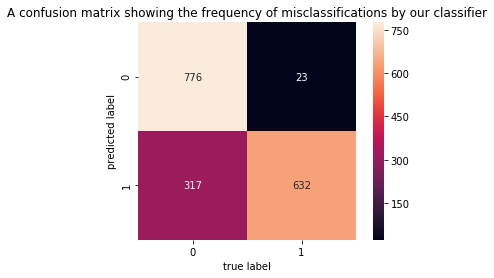

In [27]:
#Random Forest Classifier 

model(RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0), X, train_X, train_y,
      test_X, test_y, undersampled = False, oversample = True)


Undersampling the dataset
Accuracy Score ->  79.74828375286042
F1Score 0.7965870361019944
Precision 0.8331659484715364
Recall 0.8166453594807684
Sensitivity: 97.56%
Specificity: 69.08%


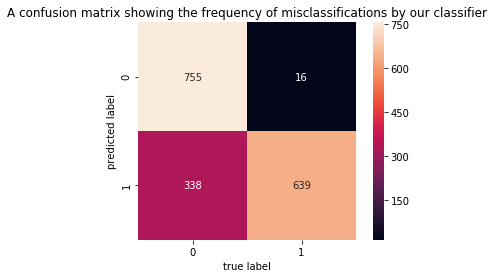

In [28]:
model(RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0), X, train_X, train_y,
      test_X, test_y, undersampled = True, oversample = False)


Accuracy Score ->  83.0091533180778
F1Score 0.8257149331520508
Precision 0.8433340550204982
Recall 0.8232006858537406
Sensitivity: 89.62%
Specificity: 79.05%


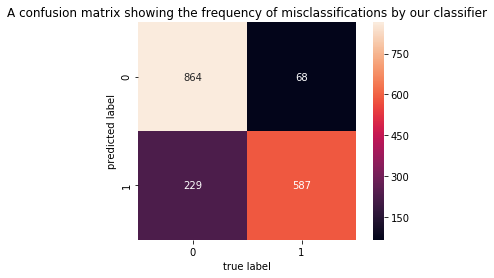

In [29]:
model(RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0), X, train_X, train_y,
      test_X, test_y, undersampled = False, oversample = False)